In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time
from copy import deepcopy
from Preprocess import read_neural_data as read
from Preprocess import preprocess_raw_data as prep

In [33]:
_start_time = time.time()
def tic():
    global _start_time
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec, 60)
    (t_hour, t_min) = divmod(t_min, 60)
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour, t_min, t_sec))

# Read and Preprocess

In [35]:
data_file_path = './Data/'
rdata = read.read_neural_data(data_file_path)

Extract events based on target tags...
Downsample data to 2000Hz...
Band pass filter data based on filter_range:[0.5, 128]Hz...
Finding fft and psd of data...


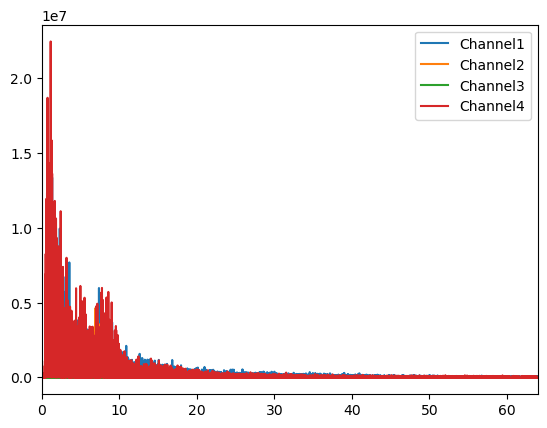

Watch the PSD of all channels and check the results and then close it for decision!
Epoch data based on target tags...
The preprocessed data saved in "./Data//data_pp.pkl"


In [20]:
prep_obj = prep.preprocess_raw_data(target_rate = 2000, target_tags = [20,40], save_path = data_file_path)
data_pp = prep_obj.fit(rdata)

In [21]:
ERP_EV20 = np.mean(data_pp['ev20']['data'],axis=2)
ERP_EV40 = np.mean(data_pp['ev40']['data'],axis=2)

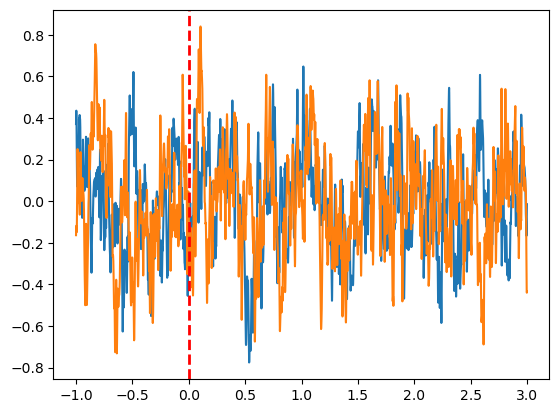

In [22]:
plt.plot(data_pp['time'],ERP_EV20[0,:])
plt.plot(data_pp['time'],ERP_EV40[0,:])
plt.axvline(0,color='r',linewidth=2,linestyle='--')

# Preprocess [Archived]

In [23]:
# def extract_events(data, target_tags=None):
    
#     data = deepcopy(data)
    
#     if not target_tags:
#         target_tags = np.unique(data['tags'])
#         target_tags = np.delete(target_tags,np.where([target_tags==0])[0])
#     event_idx = np.where(np.diff(data['tags'])>0)[0] + 1
#     event_idx = event_idx[np.isin(data['tags'][event_idx],target_tags)]
#     event_times = data['time'][event_idx]
#     event_tags = data['tags'][event_idx]
#     data['tags'] = {}
#     data['tags']['etags'] = event_tags
#     data['tags']['etimes'] = event_times
#     return data

In [24]:
# def filter_rdata(data, freq_range = [0.5,128], order = 2):
    
#     data = deepcopy(data)
#     if freq_range[-1] >= data['srate']/2:
#         [num,den] = sp.signal.butter(order, 2*np.array(freq_range[0])/data['srate'], btype='highpass')
#     else:
#         [num,den] = sp.signal.butter(order, 2*np.array(freq_range)/data['srate'], btype='bandpass')
#     for ch in range(data['nch']):
#         data['data'][ch,:] = sp.signal.filtfilt(num,den,data['data'][ch,:])
#     return data

In [25]:
# def downsample_rdata(data, target_rate, filter_order=3):

#     if target_rate == data['srate']:
#         return data
    
#     data = deepcopy(data)
    
#     # Calculate Nyquist frequency for original and target sampling rates
#     nyquist_original = 0.5 * data['srate']
#     nyquist_target = 0.5 * target_rate

#     # Design a low-pass filter
#     cutoff_frequency = min(nyquist_original, nyquist_target)
#     b, a = sp.signal.butter(filter_order, cutoff_frequency / nyquist_original)
    
#     temp = sp.signal.resample_poly(data['data'][0,:], target_rate, data['srate'])
#     resampled_signal = np.zeros([data['nch'], len(temp)])
#     for ch in range(data['nch']):
        
#         # Apply the low-pass filter
#         filtered_signal = sp.signal.filtfilt(b, a, data['data'][ch,:])
        
#         # Downsample the filtered signal
#         resampled_signal[ch,:] = sp.signal.resample_poly(filtered_signal, target_rate, data['srate'])

    
#     new_time = np.arange(0,resampled_signal.shape[1])/target_rate
#     data['data'] = resampled_signal
#     data['time'] = new_time
#     data['srate'] = target_rate
#     return data

In [26]:
# def epoch_data(data, target_tags, time_interval = [-1,3]):
    
#     data = deepcopy(data)
#     data['tags']['etimes'] = data['tags']['etimes'][np.isin(data['tags']['etags'],target_tags)]
#     data['tags']['etags'] = data['tags']['etags'][np.isin(data['tags']['etags'],target_tags)]
#     tags_idx = np.int32(np.round(data['tags']['etimes']*data['srate']))
#     n_int = np.int32(np.array([time_interval[0],time_interval[-1] - 1/data['srate']])*data['srate'])
#     n_epoch = n_int[-1]-n_int[0]+1
    
#     data_epoched = np.zeros([data['nch'],n_epoch,len(tags_idx)])
#     for tr in range(len(tags_idx)):
#         data_epoched[:,:,tr] = data['data'][:,(tags_idx[tr]+n_int[0]):(tags_idx[tr]+n_int[-1]+1)]
    
#     data['data'] = data_epoched
#     data['time'] = np.arange(time_interval[0],time_interval[-1],1/data['srate'])
#     data['ntr'] = np.shape(data['data'])[2]

#     data_epoched = (data_epoched - np.mean(data_epoched[:,data['time']<0,:], axis=1, keepdims=True))/np.std(data_epoched[:,data['time']<0,:], axis=1, keepdims=True)
#     data['data'] = np.apply_along_axis(sp.stats.zscore , 1, data['data'])
#     return data

In [27]:
# tint = [-1.5,6]
# new_srate = 256
# events_tags = [20,40]
# rdata = extract_events(rdata)
# data_pp = downsample_rdata(rdata, new_srate)
# data_pp = filter_rdata(data_pp)
# data_ev20 = epoch_data(data_pp,target_tags=20, time_interval=tint)
# data_ev40 = epoch_data(data_pp,target_tags=40, time_interval=tint)

In [28]:
# ch = 4
# plt.subplot(211)
# plt.plot(data_ev20['time'],np.mean(data_ev20['data'],2)[ch-1,:])
# plt.axvline(0,color='r',linestyle='--',linewidth=2)
# plt.subplot(212)
# plt.plot(data_ev40['time'],np.mean(data_ev40['data'],2)[ch-1,:])
# plt.axvline(0,color='r',linestyle='--',linewidth=2)

In [29]:
# def myfft(data, nfft = None, ifPlot = None):
#     if not nfft:
#         ndim = data['data'].ndim
#         if ndim == 1:
#             nfft = len(data['data'])

#         elif ndim == 2:
#             nfft = data['data'].shape[1]
#         else:
#             raise ValueError("Not supporting the epoched data or any other data with dimension higher than 3")
    
#     Xf = np.zeros([data['nch'],nfft//2])
#     for ch in range(data['nch']):
#         Xf[ch,:] = np.abs(sp.fft.fft(data['data'][ch,:], nfft)[:nfft//2])
#     freq = sp.fft.fftfreq(nfft, 1/data['srate'])[:nfft//2]

#     print(Xf.shape)
#     if ifPlot:
#         for ch in range(data['nch']):
#             plt.plot(freq,Xf[ch,:],label='Channel'+str(ch))
#         plt.legend()
#         plt.xlim([0,64])
#         plt.show()
#     else:
#         return Xf, freq

In [30]:
# myfft(data_pp, ifPlot = True)

In [31]:
import pickle

In [32]:
with open('./Data/data_pp.pkl','rb') as f:
    loaded = pickle.load(f)

print(loaded)

{'tags': {'etags': array([255,  40,  10,  20,  10,  20,  10,  40,  10,  40,  10,  20,  10,
        20,  10,  20,  10,  40,  10,  20,  10,  20,  10,  40,  10,  20,
        10,  40,  10,  40,  10,  20,  10,  20,  10,  20,  10,  20,  16,
        10,  40,  10,  20,  10,  20,  10,  20,  10,  20,  10,  20,  10,
        40,  10,  20,  10,  40,  10,  20,  10,  40,  10,  40,  10,  40,
        10,  40,  10,  20], dtype=uint8), 'etimes': array([  15.122 ,   17.126 ,   24.1155,   49.039 ,   56.027 ,   80.95  ,
         87.9365,  112.8605,  119.8445,  144.7675,  151.7525,  176.675 ,
        183.66  ,  208.5835,  215.571 ,  240.495 ,  247.4835,  272.407 ,
        279.4   ,  304.324 ,  311.311 ,  336.233 ,  343.2205,  368.1425,
        375.132 ,  400.055 ,  407.041 ,  431.9635,  438.9475,  463.871 ,
        470.8615,  495.784 ,  502.7685,  527.69  ,  534.6765,  559.6   ,
        566.588 ,  591.512 ,  598.4935,  598.499 ,  623.422 ,  630.406 ,
        655.327 ,  662.3135,  687.237 ,  694.225 ,  719.14